In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# import plotly.express as px

# from sklearn import set_config

# from yellowbrick.cluster import KElbowVisualizer
# from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


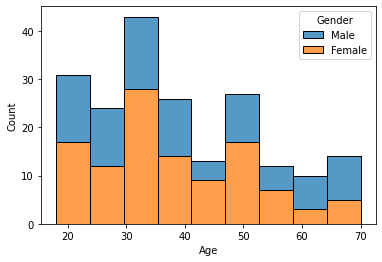

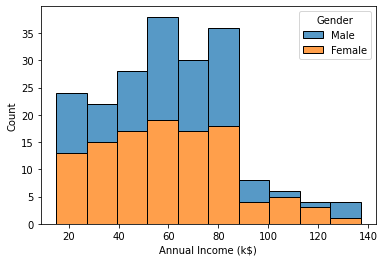

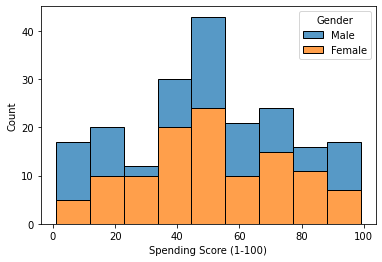

In [4]:
num_data = ['Age','Annual Income (k$)','Spending Score (1-100)']

for i in num_data:
    sns.histplot(data=data, x=i, hue='Gender', multiple='stack')
    plt.show()
# sns.histplot(data=data, x='Age', hue='Gender', binwidth=10, multiple='stack')

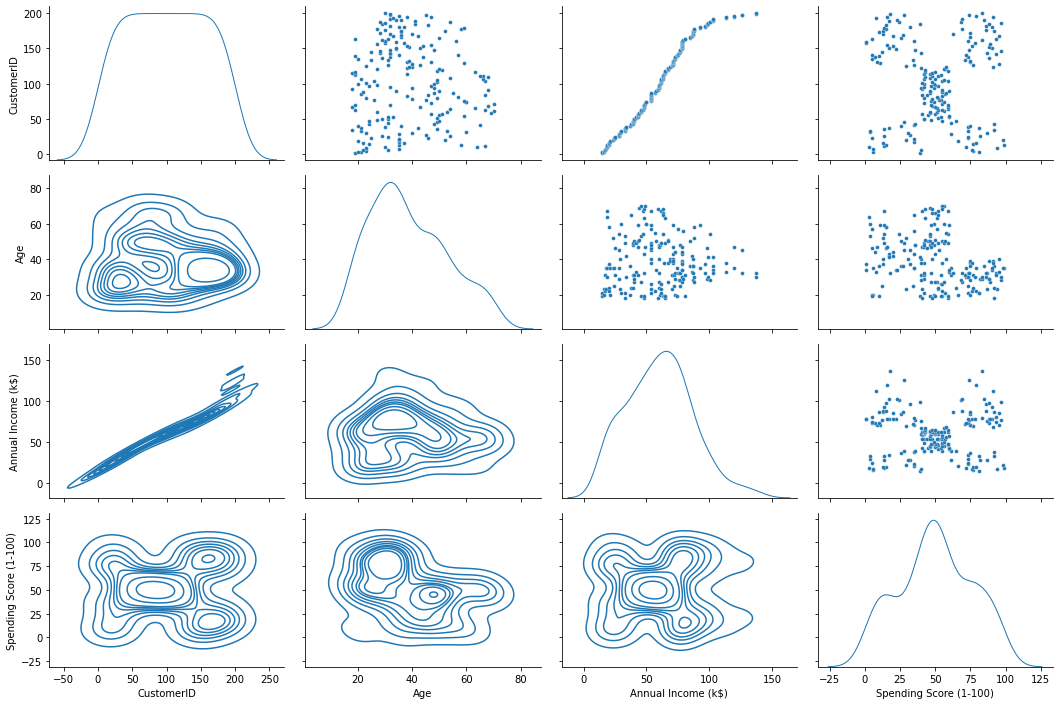

In [8]:
grid = sns.PairGrid(data, diag_sharey=False, aspect=1.5)

grid.map_upper(sns.scatterplot, s=15)
grid.map_lower(sns.kdeplot)
grid.map_diag(sns.kdeplot, lw=1);

In [37]:
# sns.pairplot(data, hue='Gender', aspect=1.5)

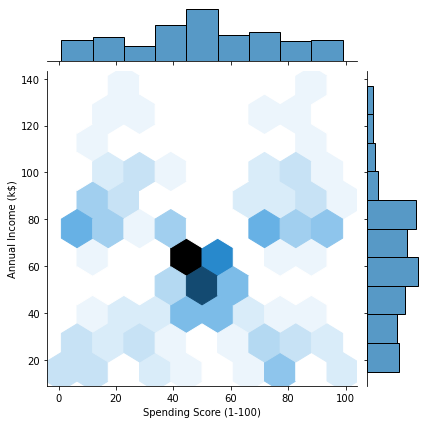

In [9]:
sns.jointplot(data=data, x='Spending Score (1-100)', y='Annual Income (k$)',kind='hex' )

In [12]:
data['Gender'] = data.Gender.map({'Male': 0, 'Female':1 })
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [15]:
kmeans = KMeans(n_clusters=5)
model = kmeans.fit(data)

In [17]:
data['label'] = model.labels_

In [18]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,4
3,4,1,23,16,77,2
4,5,1,31,17,40,4


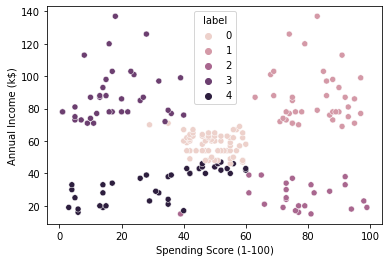

In [30]:
sns.scatterplot(y='Annual Income (k$)', x='Spending Score (1-100)', data=data, hue='label')
sns.set_palette('ocean')
plt.show()

In [33]:
 silhouette_score(data,)

TypeError: silhouette_score() missing 1 required positional argument: 'labels'